# Practice on images descriptors (except deep descriptors)
## M1 DSAI - Intro to ML
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)
### Student: Martiros Yeghiazaryan

In [15]:
from skimage import io
from skimage import data
from skimage import transform
import numpy as np
from matplotlib import pyplot as plt
import math

In [16]:
%matplotlib inline

## Images from the library scikit-image

In [17]:
#img = data.coffee()
img = data.chelsea()
#img = io.imread('/home/lingrand/Ens/SSII/Cours8-contours/carreNoir.png') #data.coffee()
# you can save an image to an image file
#io.imsave("coffee.png",img)

In [18]:
print(img.shape)

(300, 451, 3)


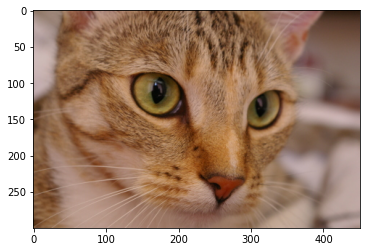

In [19]:
plt.imshow(img)

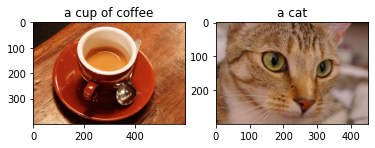

In [20]:
# a figure with 2 images
fig, axes = plt.subplots(nrows=1, ncols=2)
# print(type(axes))
ax = axes.ravel()
ax[0].imshow(data.coffee())
ax[0].title.set_text('a cup of coffee')
ax[1].imshow(data.chelsea())
ax[1].title.set_text('a cat')

## Smoothing using convolution

We will start to use a simple method of 2D convolution: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html">scipy.ndimage.convolve</a>.

Gaussian smoothing is approximated by a convolution with the kernel $\frac{1}{16}\begin{pmatrix} 1 & 2 & 1\\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{pmatrix}$.

This convolution only deals with a single channel. We thus need to apply this function on each channel and then recompose another image.

In [21]:
from scipy import ndimage

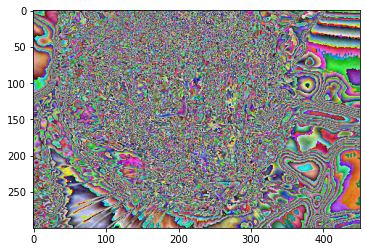

In [22]:
lissGauss3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]])
r = ndimage.convolve(img[:,:,0],lissGauss3x3)
g = ndimage.convolve(img[:,:,1],lissGauss3x3)
b = ndimage.convolve(img[:,:,2],lissGauss3x3)
imgLisse = np.dstack((r,g,b))
plt.imshow(imgLisse)

Strange colors ... What's the problem ? How to improve ?

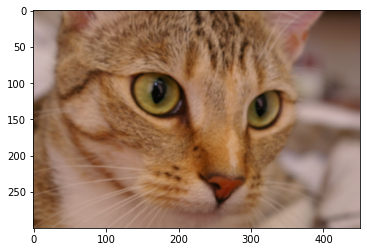

In [23]:
lissGauss3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
r = ndimage.convolve(img[:,:,0],lissGauss3x3)
g = ndimage.convolve(img[:,:,1],lissGauss3x3)
b = ndimage.convolve(img[:,:,2],lissGauss3x3)
imgLisse = np.dstack((r,g,b))
plt.imshow(imgLisse)

This image looks better !

## Edges by first derivative

A well-know detector is the one by Sobel. Have a look on the edges long x-axis and y-axis before composing the final result. 

min =  0
max =  255
[246 246 245]


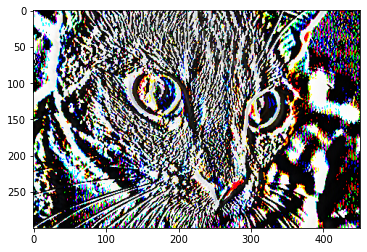

In [24]:
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])/4.0

r = ndimage.convolve(img[:,:,0],sobelx)
g = ndimage.convolve(img[:,:,1],sobelx)
b = ndimage.convolve(img[:,:,2],sobelx)
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[100,400,:])

If you are note sure of the result, try your detector on a simple image composed of a black square on a white background.

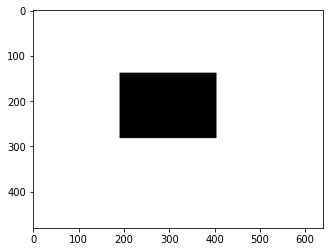

In [27]:
img = io.imread('carreNoir.png') 
plt.imshow(img)

<class 'numpy.ndarray'> (480, 640) <class 'numpy.uint8'> 0 255


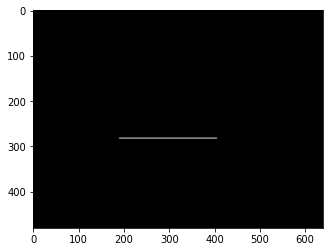

In [28]:
sobel_mag = ndimage.sobel(img[:,:,0], axis=0)
print(type(sobel_mag), sobel_mag.shape,type(sobel_mag[0][0]),sobel_mag.min(), sobel_mag.max())
plt.imshow(sobel_mag, cmap = plt.cm.gray )
#plt.imshow(np.abs(ndimage.sobel(img[:,:,0],axis=0)),cmap=plt.cm.gray) # ou axis =1

Why do you obtain only a single horizontal edge ?

And what about to write the code from scratch ?

In [29]:
img[:,:,0].shape

(480, 640)

In [30]:
# img has only a single channel and k is from odd dimensions.
# we will ignore borders
def maConvolution(img, k):
    (h,w) = img.shape
    dimK = k.shape[0]
    d = dimK//2
    res = np.zeros(shape=(h,w), dtype=np.float64)
    for i in range(d, h-d):
        for j in range(d, w-d):
            for u in range(dimK):
                for v in range(dimK):
                    ## à vous d'ajouter la bonne ligne ICI
                    res[i][j] = np.mean(img[i-d:i+d+1, j-d:j+d+1]*k)
    return res

min =  0.0
max =  28.333333333333332
[0. 0. 0.]


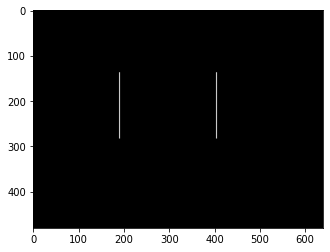

In [31]:
sobelx = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])/4.0
sobely = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])/4.0

r = np.abs(maConvolution(img[:,:,0],sobelx))
g = np.abs(maConvolution(img[:,:,1],sobelx))
b = np.abs(maConvolution(img[:,:,2],sobelx))
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[100,400,:])

Let's forger ndimage for Sobel edges and take a look to scikit-image.

In [32]:
from skimage.filters import sobel

-1.0 1.0
<class 'numpy.float64'>


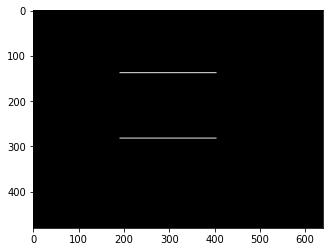

In [33]:
sobelx = sobel(img,axis=0) # or axis = 0
print(sobelx.min(), sobelx.max())
plt.imshow(np.abs(sobelx))
print(type(sobelx[0][0][0]))

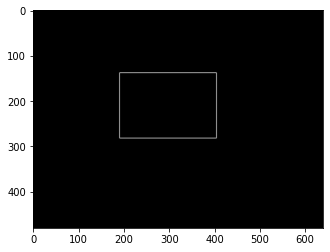

In [34]:
# we now compute the strengh of the edges
sobel_mag = np.sqrt(sobel(img, axis=0)**2 + sobel(img, axis=1)**2)/math.sqrt(2)
plt.imshow(sobel_mag)

Apply Sobel edges detection to several images of your choice.R

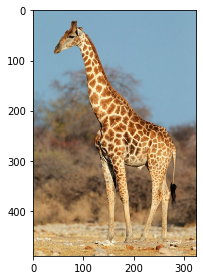

In [35]:
# for you
img = io.imread('giraffe.png')
io.imshow(img)


In [36]:
img.shape

(490, 326, 4)

min =  0
max =  255
[0 0 2]


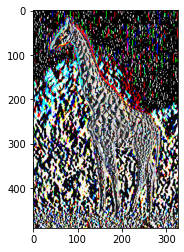

In [37]:
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])/4.0

r = ndimage.convolve(img[:,:,0],sobelx)
g = ndimage.convolve(img[:,:,1],sobelx)
b = ndimage.convolve(img[:,:,2],sobelx)
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[100,300,:])

Test also other edge detectors using first derivatives such as, for example, <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.prewitt">Prewitt</a>.

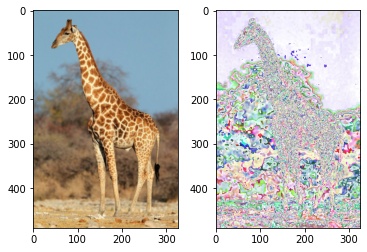

In [47]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
img = io.imread('giraffe.png')
result = ndimage.prewitt(img)
ax1.imshow(img)
ax2.imshow(result)
plt.show()

## Edges by second derivative

Test also the detector from <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.laplace">Laplace</a>.

In [53]:
from google.colab.patches import cv2_imshow

# perform gaussian smoothing
lissGauss3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
r = ndimage.convolve(img[:,:,0],lissGauss3x3)
g = ndimage.convolve(img[:,:,1],lissGauss3x3)
b = ndimage.convolve(img[:,:,2],lissGauss3x3)
imgGauss = np.dstack((r,g,b))

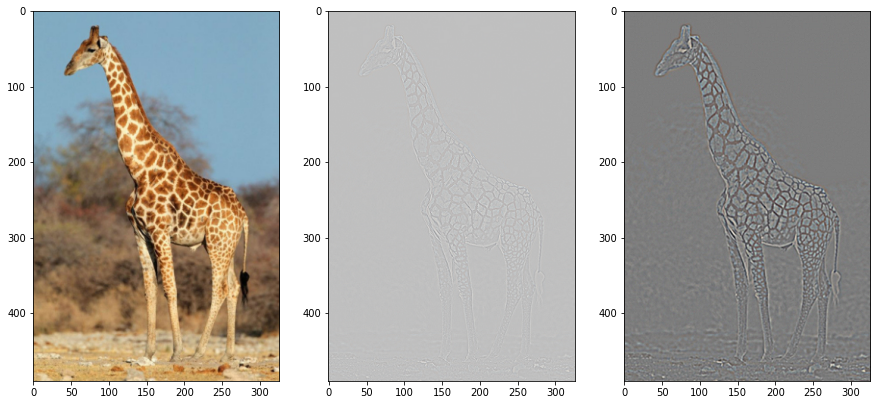

In [54]:
# apply Laplacian operator on image
laplacian_1 = cv2.Laplacian(img, cv2.CV_64F)

# normalize and convert to 8-bit
laplacian_1 = cv2.normalize(laplacian_1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


# apply Laplacian operator on gaussian smoothed image
laplacian_2 = cv2.Laplacian(imgGauss, cv2.CV_64F)

# normalize and convert to 8-bit
laplacian_2 = cv2.normalize(laplacian_2, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)



#showing the laplacian results difference between raw and already gaussian smoothed images

fig = plt.figure(figsize=(15, 30))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)  
ax3 = fig.add_subplot(133) 

ax1.imshow(img)
ax2.imshow(laplacian_1)
ax3.imshow(laplacian_2)
plt.show()

## Edges by difference of gaussians

Smooth a image twice using different smoothing and look at the difference of the results (absolute value).

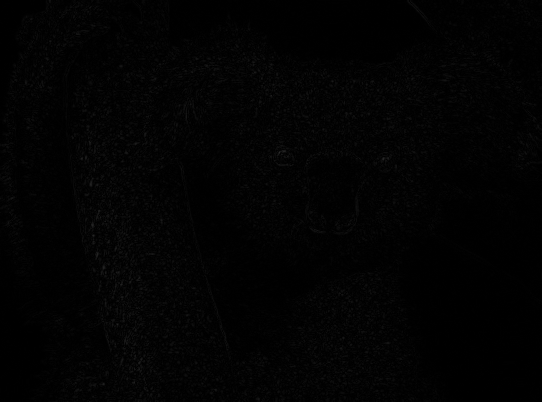

In [58]:
# read image
img = cv2.imread("coala.png")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# smooth image using Gaussian blur
gaussian = cv2.GaussianBlur(gray, (5, 5), 0)

# smooth image using median blur
median = cv2.medianBlur(gray, 5)

# calculate absolute difference
abs_diff = cv2.absdiff(gaussian, median)

# display the result
cv2_imshow(abs_diff)

So we see that the difference between this 2 smoothed images is very small and the absolute difference gives values close to 0 that is why we see a black image here.

## Thresholding of the edges points

Test simple thresholding or <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.apply_hysteresis_threshold">hysteresis</a>. Is it obvious to find the correct threshold value?

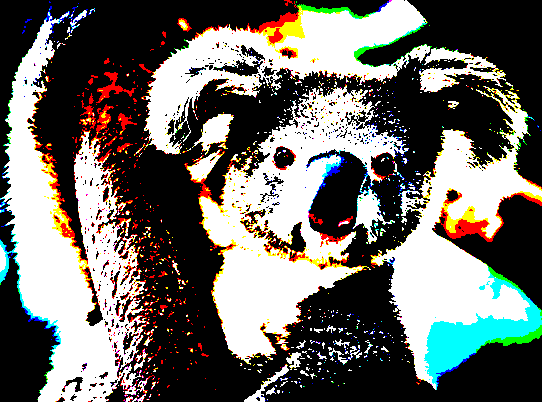

128.0


In [62]:
#simple thresholding with threshold value of 128
threshold_value = 128

value, threshold = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

cv2_imshow(threshold)
print(value)

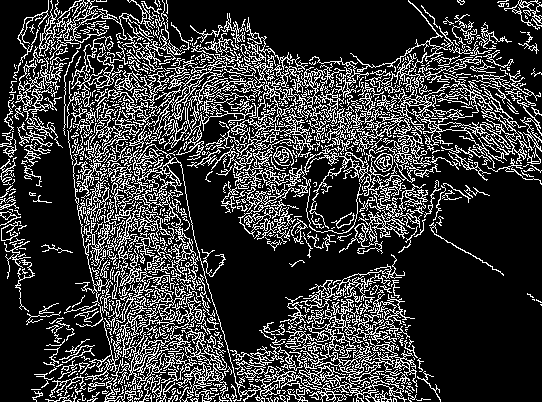

In [63]:
#simple hysterisis 

# set threshold values
low_threshold = 50
high_threshold = 150

# apply hysteresis thresholding
edges = cv2.Canny(img, low_threshold, high_threshold)

# display the result
cv2_imshow(edges)

It is not obvious to choose the threshhold value.
For example, if the image has a high contrast and the object ont he image is well separated from the background, the threshold value will be easy to find. However, if the image has a low contrast or a high level of noise, finding the correct threshold value will be more difficult.

We can use these methods to find the best threshold value.

*  Image histograms
*  Otsu's method: Otsu's method is an automated method that finds the threshold value that maximizes the variance between the object of interest and the background.
*  Adaptive thresholding: Adaptive thresholding is a method that uses a different threshold value for each pixel based on the local intensity values. This method is useful when the image has a varying level of contrast or noise.



## Points of interest

### Harris

Let's start with Harris:

(463, 665)


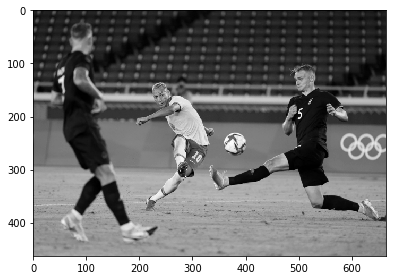

In [128]:
from skimage.feature import corner_harris, corner_peaks
img = io.imread('football.png', as_gray=True)
print(img.shape)
io.imshow(img)


7295  points found


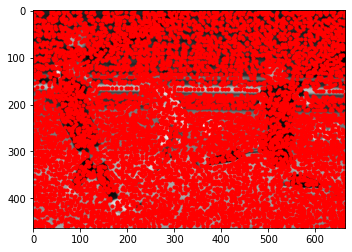

In [132]:
pts=corner_peaks(corner_harris(img), min_distance=1)
print( pts.shape[0], ' points found')
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.scatter(y=pts[:,0],x=pts[:,1],c='r',s=10)
plt.show()

How to add points of interest ? Have a look to the default parameters.

### SIFT

Let's try the SIFT detector and descriptor. We will use the OpenCV implementation. 

In [125]:
# !pip install opencv-contrib-python

import cv2
print(cv2.__version__)

4.6.0


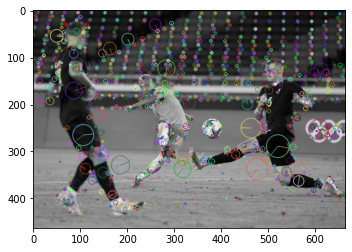

In [126]:
img = io.imread('football.png')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_img,None)
img_with_keypoints = cv2.drawKeypoints(gray_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_keypoints)